In [7]:
import h5py

import math
import bisect
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.font_manager
import matplotlib.pyplot as plt
matplotlib.font_manager._rebuild()
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
from IPython.display import set_matplotlib_formats
from IPython.display import display, Latex
set_matplotlib_formats('png', 'pdf')
import seaborn as sns

In [71]:
class Data:
    def __init__(self, file):
        with h5py.File(file, 'r') as f:
            self.at = f["Coefficients/at"][()]
            self.M = 1
            self.N = 2
            self.aPos = f["Coefficients/APos"][()]
            self.aNeg = f["Coefficients/ANeg"][()]
            self.bPos = f["Coefficients/BPos"][()]
            self.bNeg = f["Coefficients/BNeg"][()]
            self.cPos = f["Coefficients/CPos"][()]
            self.cNeg = f["Coefficients/CNeg"][()]
            self.dPos = f["Coefficients/DPos"][()]
            self.dNeg = f["Coefficients/DNeg"][()]
            
            self.deltab = f["Coefficients/deltab"][()]
        
            self.etaOmega = self.M/(self.N*math.pi)*(self.aPos+self.aNeg)

            self.etar = self.M/(self.N*math.pi)*(self.bNeg-self.bPos)
            
    def aPlot(self):
        plt.plot(self.at,self.aPos,label=r'$A_+$')
        plt.plot(self.at,self.aNeg,label=r'$A_-$')
        plt.xlabel(r'$\alpha$',fontsize=20)
        plt.ylabel(r'$A_\pm$',fontsize=20)
        plt.ylim([0.0,1])
        plt.xlim([2,4])
        plt.legend(fontsize=18)

        xticks = np.arange(2.0,4.1,0.25)
        xlabels = [str(2.0),'',str(2.5),'',str(3.0),'',str(3.5),'',str(4.0)]
        plt.xticks(xticks,labels=xlabels,fontsize=15)
        yticks = np.arange(0.0,1.1,0.1)
        ylabels = [str(0.0),'','','','',str(0.5),'','','','',str(1.0)]
        plt.yticks(yticks,labels=ylabels,fontsize=15)

        plt.show()
        
    def etaPlot(self):
        plt.plot(self.at,self.etaOmega)
        plt.xlabel(r'$\alpha$',fontsize=20)
        plt.ylabel(r'$\eta$',fontsize=20)
        plt.ylim([0.0,1])
        plt.xlim([2,4])

        xticks = np.arange(2.0,4.1,0.25)
        xlabels = [str(2.0),'',str(2.5),'',str(3.0),'',str(3.5),'',str(4.0)]
        plt.xticks(xticks,labels=xlabels,fontsize=15)
        yticks = np.arange(0.0,1.1,0.1)
        ylabels = [str(0.0),'','','','',str(0.5),'','','','',str(1.0)]
        plt.yticks(yticks,labels=ylabels,fontsize=15)

        plt.show()
        
    def bPlot(self):
        plt.plot(self.at,self.bPos,label=r'$B_+$')
        plt.plot(self.at,self.bNeg,label=r'$B_-$')
        plt.xlabel(r'$\alpha$',fontsize=20)
        plt.ylabel(r'$B_\pm$',fontsize=20)
        plt.axhline(0.0,linestyle='--',color='black')
        plt.ylim([-0.5,0.1])
        plt.xlim([2,4])
        plt.legend(fontsize=18)

        xticks = np.arange(2.0,4.1,0.25)
        xlabels = [str(2.0),'',str(2.5),'',str(3.0),'',str(3.5),'',str(4.0)]
        plt.xticks(xticks,labels=xlabels,fontsize=15)
        yticks = np.arange(-0.5,0.11,0.1)
        ylabels = ['',str(-0.4),'',str(-0.2),'',str(0.0),'']
        plt.yticks(yticks,labels=ylabels,fontsize=15)
        
        plt.show()
        
    def etaRadPlot(self):
        plt.plot(self.at,self.etar)
        plt.xlabel(r'$\alpha$',fontsize=20)
        plt.ylabel(r'$\eta_r$',fontsize=20)
        plt.xlim([2.0,4])
        plt.ylim([0.0,0.09])

        xticks = np.arange(2.0,4.1,0.25)
        xlabels = [str(2.0),'',str(2.5),'',str(3.0),'',str(3.5),'',str(4.0)]
        plt.xticks(xticks,labels=xlabels,fontsize=15)
        yticks = np.arange(0.0,0.1,0.01)
        ylabels = [str(0.0),'',str(0.02),'',str(0.04),'',str(0.06),'',str(0.08)]
        plt.yticks(yticks,labels=ylabels,fontsize=15)

        plt.show()
    
    
    def cPlot(self):
        plt.scatter(self.at[::5],self.cPos[::5],label=r'$C_+$')
        plt.scatter(self.at[::5],self.cNeg[::5],label=r'$C_-$')
        plt.xlabel(r'$\alpha$',fontsize=20)
        plt.ylabel(r'$C_\pm$',fontsize=20)
        plt.axhline(0.0,linestyle='--',color='black')
        plt.ylim([-0.2,0.05])
        plt.xlim([2.5,4])
        plt.legend(fontsize=18)

        xticks = np.arange(2.5,4.1,0.25)
        xlabels = [str(2.5),'',str(3.0),'',str(3.5),'',str(4.0)]
        plt.xticks(xticks,labels=xlabels,fontsize=15)
        yticks = np.arange(-0.2,0.06,0.05)
        ylabels = [str(-0.2),str(-0.15),str(-0.1),str(-0.05),str(0.0),str(0.05)]
        plt.yticks(yticks,labels=ylabels,fontsize=15)

        plt.show()
        
    def dPlot(self):
        plt.scatter(self.at[::5],self.dPos[::5],label=r'$D_+$')
        plt.scatter(self.at[::5],self.dNeg[::5],label=r'$D_-$')
        plt.xlabel(r'$\alpha$',fontsize=20)
        plt.ylabel(r'$D_\pm$',fontsize=20)
        plt.axhline(0.0,linestyle='--',color='black')
        plt.xlim([2.5,4])
        plt.ylim([-0.1,0.1])
        plt.legend(fontsize=18)

        xticks = np.arange(2.5,4.1,0.25)
        xlabels = [str(2.5),'',str(3.0),'',str(3.5),'',str(4.0)]
        plt.xticks(xticks,labels=xlabels,fontsize=15)

        yticks = np.arange(-0.1,0.11,0.01)
        ylabels = [str(-0.1),'','','','',str(-0.05),'','','','',str(0.0),'','','','',str(0.05),'','','','',str(0.1)]
        plt.yticks(yticks,labels=ylabels,fontsize=15)

        plt.show()
        
    def deltabPlot(self):
        plt.plot(self.at[1:],self.deltab[1:])
        plt.xlabel(r'$\alpha$',fontsize=20)
        plt.ylabel(r'$\frac{\delta b}{b}$',fontsize=20)
        plt.xlim([2.3,4])
        plt.ylim([0,0.5])

        xticks = np.arange(2.5,4.1,0.25)
        xlabels = [str(2.5),'',str(3.0),'',str(3.5),'',str(4.0)]
        plt.xticks(xticks,labels=xlabels,fontsize=15)
        yticks = np.arange(0.0,0.51,0.05)
        ylabels = [str(0.0),'',str(0.1),'',str(0.2),'',str(0.3),'',str(0.4),'',str(0.5)]
        plt.yticks(yticks,labels=ylabels,fontsize=15)
        def f(x):
            return 4*0.002/(4-x)
        f2 = np.vectorize(f)
        x = np.linspace(2.0, 3.99, 5000)
        plt.plot(x, f2(x),label=r'$\frac{4\eta_t}{\epsilon}$',linestyle='dashed',color='red',linewidth=2)
        
        plt.legend(fontsize=20)
        plt.show()

In [72]:
foo = Data('coefficients_alpha.h5')

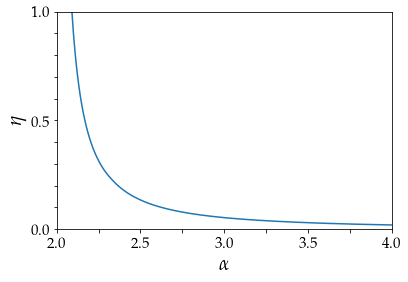

In [73]:
foo.etaPlot()

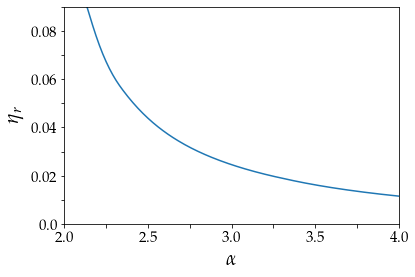

In [74]:
foo.etaRadPlot()

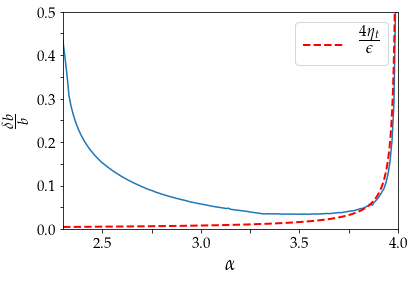

In [75]:
foo.deltabPlot()

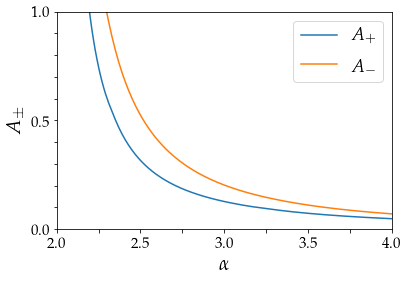

In [76]:
foo.aPlot()

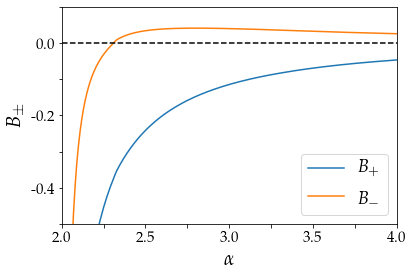

In [77]:
foo.bPlot()

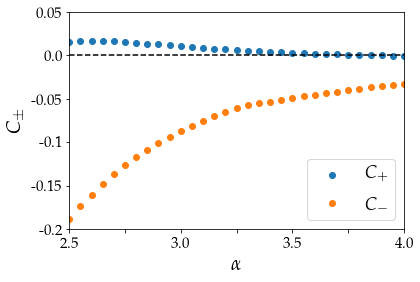

In [78]:
foo.cPlot()

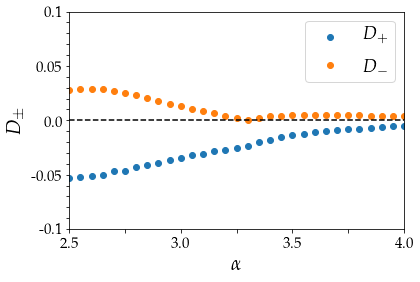

In [79]:
foo.dPlot()